In [ ]:
#islrg > div.islrc > img

In [2]:
# 18차시 : 구글 이미지 크롤러

#Step 1. 필요한 모듈과 라이브러리를 로딩합니다.

from bs4 import BeautifulSoup
from selenium import webdriver
import urllib.request
import urllib
import sys
import re
import math
import time
import os
import random
from selenium.webdriver.common.keys import Keys
import dload  # 3.6버전 이상부터 (스파르타에서 이미지 다운로드시 사용)

#import urllib.request
#import urllib

#Step 2. 필요한 정보를 입력 받습니다.
print("=" *80)
print("구글 사이트에서 이미지를 검색하여 수집하는 크롤러 입니다 ")
print("=" *80)

query_txt = input('1.크롤링할 이미지의 키워드는 무엇입니까?: ')
cnt = int(input('2.크롤링 할 건수는 몇건입니까?: '))
f_dir=input('3.파일이 저장될 경로만 쓰세요(예: c:\\doit\\data\\ ) : ')

if f_dir =='' :
    f_dir = "c:\\doit\\data\\"
print("\n")
print("요청하신 데이터를 수집 중이오니 잠시만 기다려 주세요~~^^")

real_cnt = math.ceil(cnt / 50) # 실제 크롤링 할 페이지 수

#Step 3. 파일을 저장할 폴더를 생성합니다
now = time.localtime()
s = '%04d-%02d-%02d-%02d-%02d' % (now.tm_year, now.tm_mon, now.tm_mday, now.tm_hour, now.tm_min) #now.tm_sec

os.chdir(f_dir)
os.makedirs(f_dir+s+'-'+query_txt)
os.chdir(f_dir+s+'-'+query_txt)
f_result_dir = f_dir+s+'-'+query_txt
f_name = f_dir+s+'-'+query_txt+'\\'+s+'-'+query_txt+'.txt'

#Step 4. 크롬 드라이버를 사용해서 웹 브라우저를 실행한 후 검색합니다

s_time = time.time( )

path = "c:/doit/chromedriver_win32/chromedriver.exe"
driver = webdriver.Chrome(path)

driver.get('https://www.google.com')
time.sleep(random.randrange(2, 5))

element = driver.find_element_by_name("q")

element.send_keys(query_txt)
#element.submit()
element.send_keys('\n')

# 소주제 1: 자동 스크롤 다운 기능을 구현하여 화면을 자동으로 스크롤링하기

# Step 5. 아래의 이미지 링크를 선택합니다

driver.find_element_by_link_text("이미지").click()

time.sleep(random.randrange(2, 5))


# 스크롤 다운 함수 만들기

def scroll_down(driver):
    driver.execute_script("window.scrollTo(0,document.body.scrollHeight);")
    time.sleep(3)


i = 1
while (i <= real_cnt):
    scroll_down(driver)
    i += 1

    if i == 6:
        driver.find_element_by_xpath("""//*[@id="_sau_imageTab"]/div[2]/div[8]/a""").click()

# 소주제 2: 이미지 URL 을 참고하여 그림을 추출한 후 저장하기

# Step 6. 이미지 추출하여 저장하기

#file_no = 0
file_no = 1
count = 1
img_src2 = []

html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

구글 사이트에서 이미지를 검색하여 수집하는 크롤러 입니다 
1.크롤링할 이미지의 키워드는 무엇입니까?: 캘리그라피
2.크롤링 할 건수는 몇건입니까?: 51
3.파일이 저장될 경로만 쓰세요(예: c:\doit\data\ ) : 


요청하신 데이터를 수집 중이오니 잠시만 기다려 주세요~~^^


In [3]:
imgs = driver.find_elements_by_tag_name('img')
print(imgs)
print(type(imgs))

[<selenium.webdriver.remote.webelement.WebElement (session="d4987d3e5cf2bdf67dcb77925ff2535a", element="32f95b3a-5c84-4e99-9dbb-8ea9a23414c0")>, <selenium.webdriver.remote.webelement.WebElement (session="d4987d3e5cf2bdf67dcb77925ff2535a", element="5a0c6914-f283-4b1a-b224-41d33bb8c789")>, <selenium.webdriver.remote.webelement.WebElement (session="d4987d3e5cf2bdf67dcb77925ff2535a", element="c7939b89-8fb0-4e21-826d-b4680c533e6a")>, <selenium.webdriver.remote.webelement.WebElement (session="d4987d3e5cf2bdf67dcb77925ff2535a", element="72c0d9e0-37d3-4ffb-949c-6f59459eef27")>, <selenium.webdriver.remote.webelement.WebElement (session="d4987d3e5cf2bdf67dcb77925ff2535a", element="c886cd86-265b-408a-864d-62dd3bfa802c")>, <selenium.webdriver.remote.webelement.WebElement (session="d4987d3e5cf2bdf67dcb77925ff2535a", element="c2b860e5-e706-4822-876e-f72cba013be3")>, <selenium.webdriver.remote.webelement.WebElement (session="d4987d3e5cf2bdf67dcb77925ff2535a", element="444c8d71-0e35-45e0-a6dc-2e248cc8

['', '', '', '', '', '', '', '', '', '', '', '', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRNGAKx4AOhkqHynVDRQPuOUlKqxOg0tbtztTpplcw3ydiHoCTh&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcR0Q07HoHBlnaZwWkKNOPqUriDgjvntXN6SisbkcBc&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRhctDTfBQSAhwgr44w2w3MzuovyvCFlwMB-6x3obw&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTYoZjy56qkGuWlbtLfF3qnX-2MKoWXDvKnQOZsbEE&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSm53ipPOVsiMfS8xwJ3vr0XncUV6TAGdXkoj69EU_GyqNMEtD-&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRDY60jE5QY8dsgTPicGYoxy5SO04BVMaiEcGY8QdVwZj_XSfzS&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcR7CitRDHpwXO60PTxvZS4P2qWsz_wIc00j6P1C0oQ&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTAuYHGWW3C2Vmwa-q3iKpT_jmgS2qT-3l-k2QcCOSJmDgM24hM&usqp=CAU', 'https://encrypted-tbn0.gstatic.com
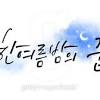
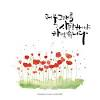
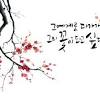
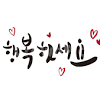
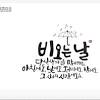
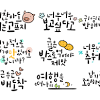
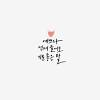
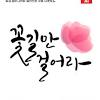
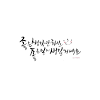
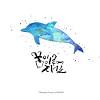
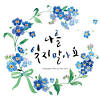
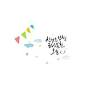
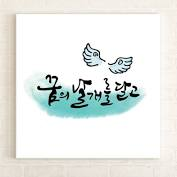
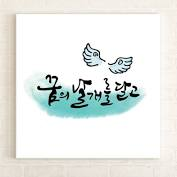
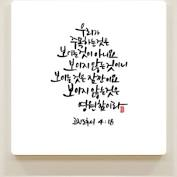
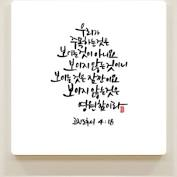
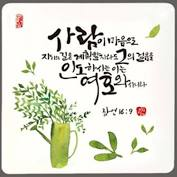
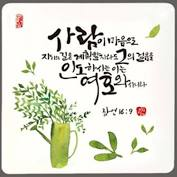
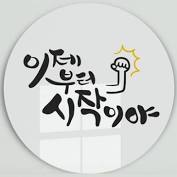
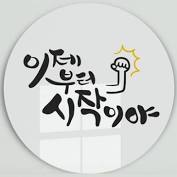
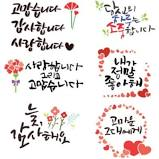
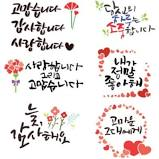
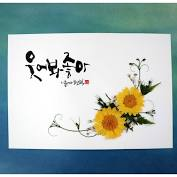
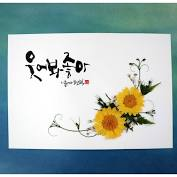
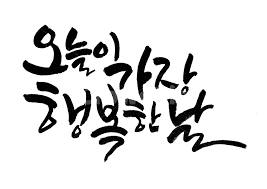
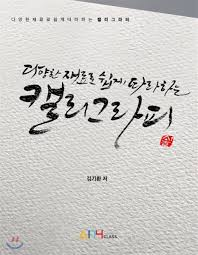
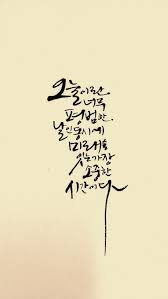
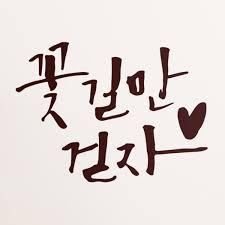
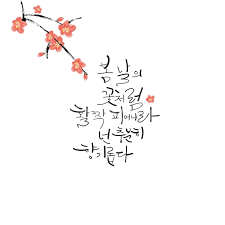
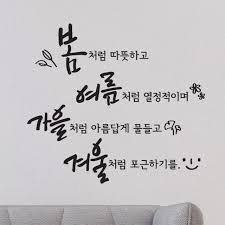
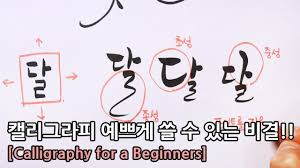
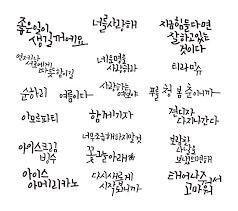
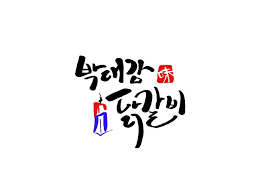
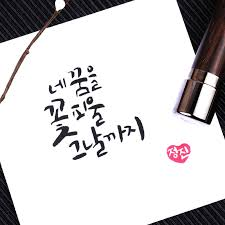
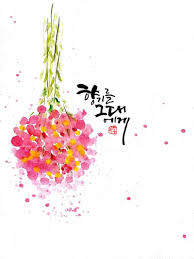
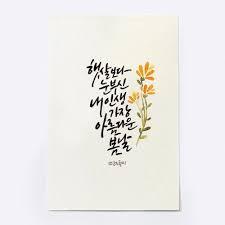
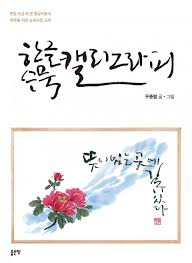
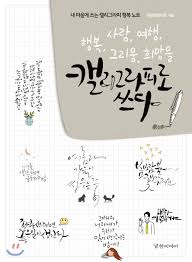
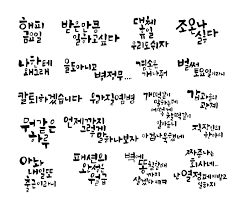
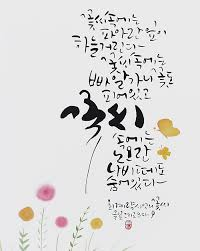
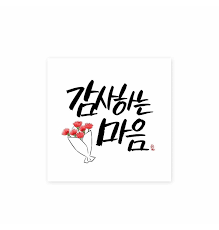
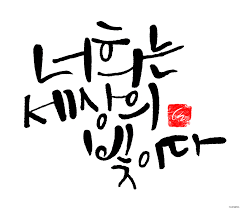
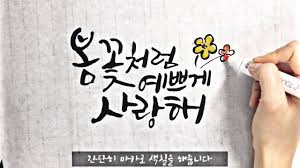
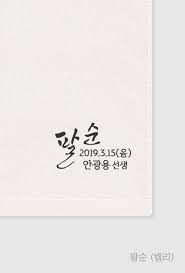

In [4]:
for img in imgs:
    img_src1 = img.get_attribute('src')
    img_src2.append(img_src1)
    count += 1

print(img_src2)
print(len(img_src2))
print(type(img_src2))

In [29]:
imgs = soup.select('''#islrg > div.islrc > div > a.wXeWr.islib.nfEiy.mM5pbd > div > img''')
#imgs = soup.find_all('''#islrg > div.islrc > div > a.wXeWr.islib.nfEiy.mM5pbd > div.bRMDJf.islir > img''')

print(imgs)
print(type(imgs))

#for img in imgs:
#    src1 = img['data-src']
#    dload.save(src1, f'{file_no}.jpg')
#    file_no += 1

[]
<class 'list'>
